# Анализ данных интернет-магазина "Стримчик"

**Описание проекта:**

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Примечание к проекту:** В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**Цель проекта:** Проанализировать деятельность интернет-магазина «Стримчик», выявить определяющие успешность игры закономерности для дальнейшего определения потенциально популярного продукта и планирования рекламных акций.

**Описание данных:**

Информация об основных данных хранится в файле 'games.csv'.

- **Name** — название игры;
- **Platform** — платформа;
- **Year_of_Release** — год выпуска;
- **Genre** — жанр игры;
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий);
- **EU_sales** — продажи в Европе (миллионы проданных копий);
- **JP_sales** — продажи в Японии (миллионы проданных копий);
- **Other_sales** — продажи в других странах (миллионы проданных копий);
- **Critic_Score** — оценка критиков (максимум 100);
- **User_Score** — оценка пользователей (максимум 10);
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).

**План работы с проектом:**
1. Загрузить данные
2. Осуществить предобработку данных
3. Провести исследовательский анализ данных
4. Составить портрет пользователя каждого региона
5. Проверить гипотезы

### 1 шаг. Загрузить данные

In [1]:
# импортируем библиотеки для работы
import pandas as pd
# импортируем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns
# импортируем библиотеку для работы с данными
import numpy as np
# импортируем библиотеку для проверки гипотез
from scipy import stats as st

#### 1.1 Откроем файл с данными

In [2]:
# загрузим файл с данными о деятельности интернет-магазина "Стримчик"
data = pd.read_csv('/datasets/games.csv')

In [3]:
# выведем первые 10 строк набора данных
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


**Примечание:** Для более комфортного воприятия названия столбцов необходимо привести его к приемлемому стилю.

#### 1.2 Изучим общую информацию о данных

In [4]:
# выведем общую информацию о датасете
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Примечание:** Видно, что в данных присутствуют пропуски (максимальное количество заполненных строк равно 16715, а в некоторых столбцах число заполненных строк значительно меньше). Также в некоторых столбцах необходимо изменить тип данных. Это такие столбцы с данными, как: 'Year_of_Release', 'Critic_Score', 'User_Score'.

#### 1.3 Обобщающий вывод этапа "Загрузить данные":
1. Файл с данными состоит из 11 столбцов и 16715 строк, данных достаточно для проведения исследования.
2. В 6 колонках присутствуют пропущенные значения.
3. Названия столбцов имеют неприемлемый стиль.
4. В некоторых столбцах укаан некоректный тип данных.

### 2 шаг. Осуществить предобработку данных

#### 2.1 Замена названий столбцов (приведение к нижнему регистру)

In [5]:
# выведем все существующие в наборе данных названия столбцов
data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
# приведем названия столбцов к нижнему регистру
data.columns = data.columns.str.lower()

In [7]:
# выведем перечень новых переименованных столбцов
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### 2.2 Обработка дубликатов

In [8]:
# посмотрим латафрейм на наличие явных дубликатов
data.duplicated().sum()

0

**Примечание:** Явные дубликаты в данных отсутствуют.

In [9]:
# посмотрим таблицу только с неявными дубликатами
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.0,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.0,83.0,5.5,E


**Примечание:** В наборе данных присутствует две полностью дублирующихся строки. Для качественного анализа их можно удалить.

In [10]:
# удаление неявных дубликатов
data = data.drop_duplicates(['name', 'platform', 'year_of_release'])

In [11]:
# проверим набор данных на наличие неявных дубликатов после их удаления
data[data.duplicated(['name', 'platform', 'year_of_release'])]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


**Примечание:** Теперь неявные дубликаты отсутствуют в наборе данных.

#### 2.3 Обработка пропусков

In [12]:
# посмотрим общее количество пропусков в датафрейме (по убыванию)
data.isna().sum().sort_values(ascending=False)

critic_score       8577
rating             6765
user_score         6700
year_of_release     269
name                  1
genre                 1
platform              0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

**Примечание:** В столбце 'name' и 'genre' присутствуют только два пропуска, посмотрим их по порядку.

In [13]:
# посмотрим конкретны строки с пропусками в столбце 'name' 
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.0,0.08,NaN,NaN,NaN


**Примечание:** Две строки с пропусками в столбце 'name' содержат и те две строки, в которых присутвуют пропуски в столбце 'genre'. Помимо двух пропусков в этих столбцах данные отсутствуют также в столбцах 'critic_score', 'user_score', 'rating'. Поэтому целесообразным решением будет удалить данные строки, так как данные в них не возможны к восстановлению.

In [14]:
# удалим две строки в столбце 'name'
data = data.dropna(subset=['name'])

In [15]:
# теперь пропуски в столбце 'name' и 'genre' отсутствуют
data.isna().sum().sort_values(ascending=False)

critic_score       8576
rating             6764
user_score         6699
year_of_release     269
name                  0
platform              0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [16]:
# посмотрим пропуски в столбце 'year_of_release'
data[data['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [17]:
# посмотрим долю пропущенных значений в столбце 'year_of_release' от общего количества заполненных строк
print('В столбце [year_of_release] есть пропуски в', (data['year_of_release'].isna().sum() / len(data['name'])*100).round(2), '% данных.')

В столбце [year_of_release] есть пропуски в 1.61 % данных.


**Примечание:** Можно заметить, что в некоторых названиях игр присутствует год выпсука самой игры, но таких строк достаточно мало. Доля пропущенных значений в столбце 'year_of_release' от общего количества составляет 1,61%, значение достаточно мало, поэтому можно полностью удалить строки с прощуенными значениями в данном столбце. Это дейсвтие не скажется критично на всем объеме данных для анализа.

In [18]:
# удалим пропущенные строки в столбце 'year_of_release'
data = data.dropna(subset=['year_of_release'])

In [19]:
# посмотрим количество пропусков в данных на данный момент
data.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
user_score         6605
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
dtype: int64

In [20]:
# посмотрим пропуски в столбце 'user_score'
data[data['user_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [21]:
# посмотрим долю пропусков в столбце 'user_score' от общего количества заполненных строк
print('В столбце [user_score] есть пропуски в', (data['user_score'].isna().sum() / len(data['name'])*100).round(2), '% данных.')

В столбце [user_score] есть пропуски в 40.17 % данных.


In [22]:
# посмотрим уникальные значения в столбце 'user_score'
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

**Примечание:** Данные пропуски нецелесообразно заменять средними или медианными значениями, так как они не будут в полной мере описывать оценку, которую мог поставить пользователь *(для всех пользователей эта цифра будет разная, так как описывает личные впечатления от игры)*. Также в данных присутствует значение 'tbm', скорее всего, это какая-то аббревиатура, которая указывает, что значение еще не выставлено или будет выставлено в ближайшее время *(например, игра новая или была запущена в тестовом формате, поэтому оценки от пользователя пока что нет)*. В данном случае все эти виды пропусков можно заменить значением-маркером, возьмем (-1), что будет обозначать, что оценки от пользователя по данной игре нет.

In [23]:
# заменим пропуски на значение-маркер
data['user_score'] = data['user_score'].fillna(-1)
data.loc[data['user_score'] == 'tbd', 'user_score'] = -1

In [24]:
# посмотрим количество уникальных значений в столбце 'user_score' после замены
data['user_score'].unique()

array(['8', -1, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [25]:
# посмотрим количество пропусков в данных на данный момент
data.isna().sum().sort_values(ascending=False)

critic_score       8461
rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
user_score            0
dtype: int64

In [26]:
# посмотрим пропуски в столбце 'critic_score'
data[data['critic_score'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,-1,NaN


In [27]:
# посмотрим долю пропусков в столбце 'critic_score' от общего количества заполненных строк
print('В столбце [critic_score] есть пропуски в', (data['critic_score'].isna().sum() / len(data['name'])*100).round(2), '% данных.')

В столбце [critic_score] есть пропуски в 51.46 % данных.


In [28]:
# посмотрим уникальные значения в столбце 'critic_score'
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

**Примечание:** Пропусков в данном столбце достаточно много (51,45%), поэтому их точно нельзя игнорировать. Данные в столбце 'critic_score' отвечают за оценку игры критиками, поэтому пропуски в этом случае тоже предлагается заметить значениями-маркерами (-1) по аналогии со столбцом 'user_score'.

In [29]:
# заменим пропуски на значение-маркер
data['critic_score'] = data['critic_score'].fillna(-1)

In [30]:
# посмотрим количество пропусков в данных на данный момент
data.isna().sum().sort_values(ascending=False)

rating             6676
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
dtype: int64

In [31]:
# посмотрим проруски в столбце 'rating'
data[data['rating'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,-1.0,-1,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,-1.0,-1,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,-1.0,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,-1.0,-1,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,-1.0,-1,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,-1.0,-1,NaN


In [32]:
# посмотрим долю пропусков в столбце 'rating' от общего количества заполненных строк
print('В столбце [rating] есть пропуски в', (data['rating'].isna().sum() / len(data['name'])*100).round(2), '% данных.')

В столбце [rating] есть пропуски в 40.6 % данных.


In [33]:
# посмотрим уникальные значения в столбце 'rating'
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

**Примечание:** Значения в столбце 'rating' обозначают рейтинг от организации ESRB, а также являются категориальными, поэтому будет логично заменить пропуски в этом столбце на значения-маркеры, но не (-1), а (unknown).

In [34]:
data['rating'] = data['rating'].fillna('unknown')

In [35]:
# проверим пропуски в датафрейме на данный момент
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### 2.4 Преобразование данных в нужные типы

In [36]:
# снова посмотрим информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  float64
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  float64
 9   user_score       16443 non-null  object 
 10  rating           16443 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


In [37]:
# заменим тип данных в столбце 'year_of_release'
data['year_of_release'] = data['year_of_release'].astype('int')

**Примечание:** Тип данных в столбце 'year_of_release' изначально был 'float', его лучше заменить на целочисленные значения типа ('int'). В целом принято, что года обозначают целым числом, без какой-либо дробной части.

In [38]:
# заменим тип данных в столбце 'critic_score'
data['critic_score'] = data['critic_score'].astype('int')

**Примечание:** Тип данных в столбце 'critic-score' изначально был 'float', его лучше преобразовать к целочисленному типу ('int'), так как все данные в этом столбце после запятой-разделителя не имеют никаких чисел, соответственно можно обрезать дробную часть.

In [39]:
# заменим тип данных в столбце 'user_score'
data['user_score'] = data['user_score'].astype('float')

**Примечание:** Тип данных в столбце 'user_score' изначально был 'object', хотя этот столбец отвечает за оценку пользователей и выражен в основном числом с дробной частью. Поэтому было принято решение привести все значения в этом столбце к типу 'float'.

In [40]:
# посмотрим измененную информацию о данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     16443 non-null  int64  
 9   user_score       16443 non-null  float64
 10  rating           16443 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


**Примечание:** Все типы данных были успешно заменены.

#### 2.5 Подсчет суммарных продаж во всех регионах

In [41]:
# общее количество продаж во всех регионах запишем в новый столбец
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [42]:
# посмотрем первые 5 строк таблицы с новым столбцом
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,unknown,31.38


#### 2.6 Обобщающий вывод этапа "Осуществить предобработку данных":
1. Заменены названия столбцов (приведены к нижнему регистру).
2. В данных отсутствуют явные дубликаты.
3. Обработаны пропуски в столбцах 'name' и 'genre' *(имели общие пропуски)*.
4. Обработаны пропуски в столбце 'year_of_release' (они были удалены).
5. Обработаны проуски в столбцах 'user_score', 'critic_score', 'rating' (они были заменены значениями-маркерами (-1) и (unknown), соответственно).
6. Данные в столбцах 'year_of_release', 'user_score', 'critic_score' были приведены к нужному типу данных.
7. Был создан столбец 'total_sales' с общим количеством продаж во всех регионах.

### 3 шаг. Провести исследовательский анализ данных

#### 3.1 Исследование выпуска игр по годам

In [43]:
# посмотрим сводную статистику по столбцу 'year_of_release'
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

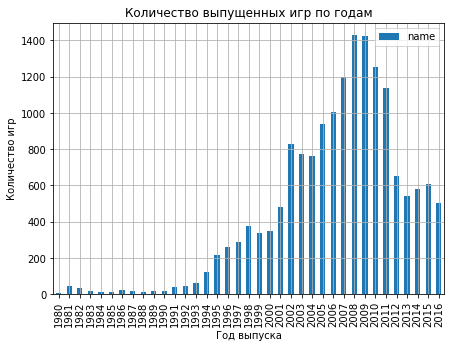

In [44]:
# сформируем сводную таблицу для построения графика
(
    data.pivot_table(index='year_of_release', values='name', aggfunc='count')
    .plot(kind='bar', grid=True, figsize=(7, 5))
)
plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Вывод по исследованию выпуска игр по годам:**
1. В таблице представлены игры с годом выпуска с 1980 по 2016 год.
2. Количество выпускаемых игр возрастает, начиная с 1994-1995 года.
3. Наибольшее количество игр было выпущено в 2008 году.

4. Для исследования не стоит использовать данные за все периоды, лучше брать игры, выпущенные за последние 5-10 лет. Это связано с тем, что со временем некоторые старые игры могут забываться, находится на стадии обновления, и поэтому не пользоваться высоким спросом. Проводить исследование лучше на актуальных данных.

#### 3.2 Исследование изменения продаж в зависимости от платформы

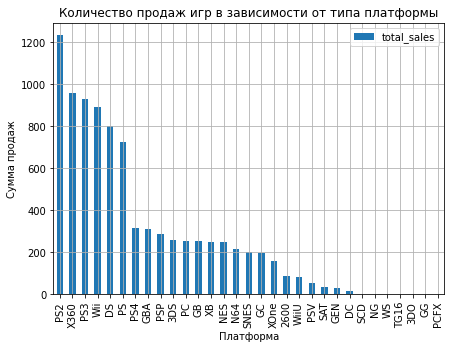

In [45]:
# изменение продаж в зависимости от платфомы
(
    data.pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(7, 5))
)
plt.title('Количество продаж игр в зависимости от типа платформы')
plt.xlabel('Платформа')
plt.ylabel('Сумма продаж')
plt.show()

**Примечание:** Наибольшее количество продаж зафиксировано у 6 платформ, все остальные колеблются на примерно одинаковом уровне.

In [46]:
# создадим переменную, в которой записаны платформы по суммарному количеству продаж
platforms_top = data.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

# создадим список с 6 платформами, на которых было сделано наибольшее суммарное количество продаж
platforms_top = platforms_top['platform'].head(6).tolist()

# выведем список
platforms_top

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']

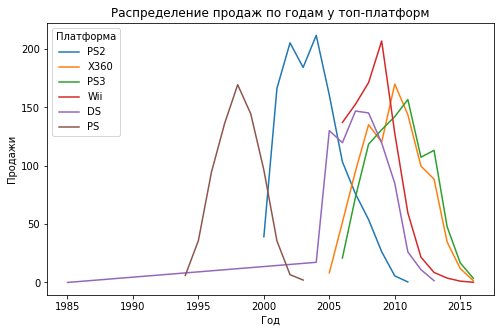

In [47]:
# напишем цикл, который для каждой платформы из спика будет расчитывать количество продаж по годам
for name in platforms_top:
    (
        data.query('platform == @name')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values(by='year_of_release', ascending = False)['total_sales']
        .plot(kind='line', figsize = (8, 5), label=name)
    )
    plt.title('Распределение продаж по годам у топ-платформ')
    plt.legend(title='Платформа', loc='upper left') 
    plt.xlabel('Год')
    plt.ylabel('Продажи')  

**Примечание:** На графике видно выбивающееся значение для платформы DS, которое визуально сильно отличается от распределения продаж на других платформах.

In [48]:
# посмотрим, сколько существует выбивающихся значений
ds_number = data.query('platform == "DS" and year_of_release < 1995')

# выведем получившиеся значения (строку или строки)
ds_number

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.0,0.02,0.0,-1,-1.0,unknown,0.02


**Примечание:** Данную строку со значениями для платформы "DS" можно спокойно удалить, так как она носит сомнительный уровень информативности (нет данных по продажам в разных странах и в столбцах 'critic_score', 'user_score', 'rating' стоят значения-маркеры, которые мы сами задали для всего переченя пропущенных данных в этих столбцах).

In [49]:
# удалим строку с данными под №15957
data = data.drop(index=15957)

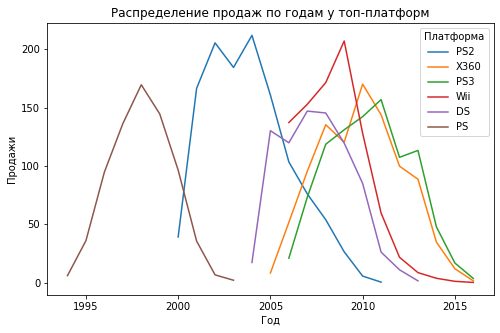

In [50]:
# с помощью созданного цикла заново построим распределение продаж игр на платформах по годам
for name in platforms_top:
    (
        data.query('platform == @name')
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .sort_values(by='year_of_release', ascending = False)['total_sales']
        .plot(kind='line', figsize = (8, 5), label=name)
    )
    plt.title('Распределение продаж по годам у топ-платформ')
    plt.legend(title='Платформа', loc='upper right') 
    plt.xlabel('Год')
    plt.ylabel('Продажи') 

**Прмечание:** Теперь на графике отсутствует аномальное значение. По линиям продаж игр на разных платформах, распределенных по годам, можно сказать, что срок активной жизни одной выпущенной игры составляет примерно 10 лет.

In [51]:
# срок, за который появляются новые и исчезают старые платформы

# сгруппируем данные по типу платформы и вычислим для них минимальное и максимальное значение года
platform_lifespan = data.groupby('platform')['year_of_release'].agg(['min', 'max'])

# вычисляем срок жизни платформы
platform_lifespan['lifespan'] = (platform_lifespan['max'] - platform_lifespan['min'])

# вычисляем средний срок жизни платформы
average_lifespan = platform_lifespan['lifespan'].mean()

print(f'Средний срок жизни платформы: {average_lifespan:.2f} лет.')

Средний срок жизни платформы: 7.00 лет.


**Вывод по исследованию изменения продаж в зависимости от платформы:**
1. Срок активной жизни (от момента выпуска до исчезнования) игры на платформе составляет примерно 10 лет.
2. Средний характерный срок, за который появляются новые и исчезают старые платформы равен 7 годам.

**Примечание:** Соответственно, за актуальный период, по котрому можно сделать прогноз на 2017 год, стоит взять последний период активной жизни платформы, то есть 10 лет (2006 - 2016 год). А это также значит, что годы до 2006 в работе рассматриваться не будут. Можно обрезать актуальный период жизни наполовину, так как в основном любая активность приходится на первую половину части жизни, когда игра была выпущена.

In [52]:
# обрежем актуальный период жизни наполовину, так как в основном любая активность приходится на первую половину части жизни, когда игра была выпущена
time = np.ceil(average_lifespan / 2)
print('Актуальный период будет равен последним', time, 'годам.')

Актуальный период будет равен последним 4.0 годам.


In [53]:
# запишем данные обо всей таблице, учитывая актуальный период жизни игры на плтформе в переменную
actual_lifespan = data.query('year_of_release >= 2016 - @time')

# выведем таблицу с данными о платформах, находящихся в актуальном периоде жизни для прогноза на 2017 год
actual_lifespan.head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,-1,-1.0,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,-1,-1.0,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79


#### 3.3 Исследование на выбор потенциально прибыльных платформ

In [54]:
# создадим переменную, в которую записана прибыльность по платформам за актуальный период
prof_platforms = actual_lifespan.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False).reset_index()

# создадим список с 10 платформами, на которых было сделано наибольшее суммарное количество продаж
prof_platforms = prof_platforms['platform'].head(10).tolist()

# выведем список
prof_platforms

['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii', 'DS']

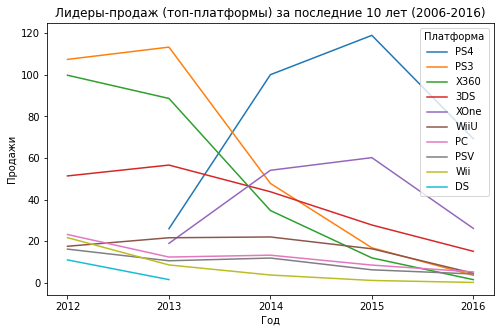

In [55]:
# так же, как и впункте выше: напишем цикл, который для каждой платформы из спика будет расчитывать количество продаж по годам
for name in prof_platforms:
    (
        actual_lifespan.query('platform == @name')
        .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
        .sort_values(by='year_of_release', ascending=False)['total_sales']
        .plot(kind='line', figsize=(8, 5), label=name)
    ) 
    plt.title('Лидеры-продаж (топ-платформы) за последние 10 лет (2006-2016)')
    plt.legend(title='Платформа', loc='upper right') 
    plt.xlabel('Год')
    plt.ylabel('Продажи')
    plt.xticks(range(2012, 2017), labels=[str(year) for year in range(2012, 2017)]) # делаем подписи годов без дробной части

**Вывод по исследованию на выбор потенциально прибыльных платформ:** 

По графику видно, что в данном активном периоде жизни (2006-2016) потенциально прибыльными платформами будут являться **PS4 и XOne**. Они относительно недавно начали вести свою деятельность (согласно графику примерно в 2013 году), поэтому к 2016 году будут набирать пик своей популярности, а, значит, и приносить достаточное количество денег.

#### 3.4 Построение графика "Ящик с усами" по глобальным продажам игр в разбивке по платформам

In [56]:
# посмотрим сводную статистку по столбцу 'total_sales' в таблице с данными об актиальном периоде
actual_lifespan['total_sales'].describe()

count    2885.000000
mean        0.501393
std         1.249340
min         0.010000
25%         0.040000
50%         0.120000
75%         0.430000
max        21.050000
Name: total_sales, dtype: float64

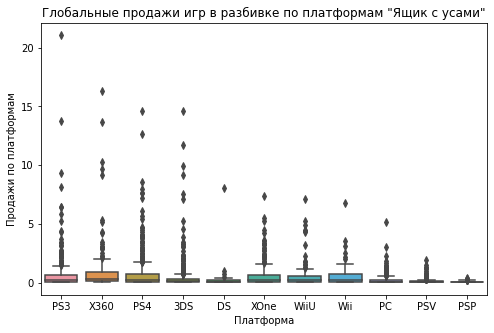

In [57]:
# построим график "Ящик с усами"
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=actual_lifespan, x='platform', y='total_sales')
plt.title('Глобальные продажи игр в разбивке по платформам "Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

**Примечание:** Почти у всех платформ есть популярные игры, которые продовались лучше всего. На графике "Ящик с усами" они помечены выбросами. Чтобы посмотреть, какие платформы в среднем продовали игры лучше, необходимо обрезать наши выбивающиеся значения *(ограничим выборку 2-мя млн. проданных игр)*.

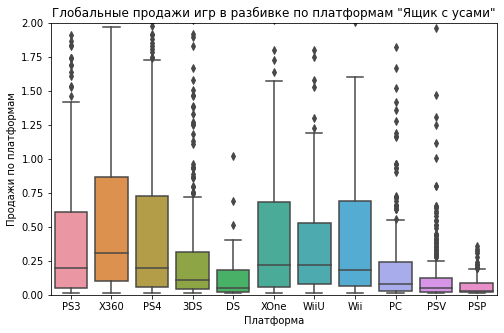

In [58]:
# построим график "Ящик с усами"
plt.figure(figsize=(8, 5))
ax = sns.boxplot(data=actual_lifespan, x='platform', y='total_sales')
ax.set(ylim=(0, 2)) # диапазон значений для оси Y будет органичена от 0 до 2 (это и есть ограничение выборки 2-мя миллионами проданных игр)
plt.title('Глобальные продажи игр в разбивке по платформам "Ящик с усами"')
plt.xlabel('Платформа')
plt.ylabel('Продажи по платформам')
plt.show()

**Примечание:** После ограничения выборки 2-мя миллионами проданных игр, выбросы не исчезли, но график стал более масштабным, что позволяет оценить среднее количество продаж на каждой платформе и выделить лидера.

**Вывод по построению графика "Ящик с усами" по глобальным продажам игр в разбивке по платформам**: 

После действия по ограничению выборки от некоторого количества выбивающихся значений *(ограничение по продажам на платформе не более 2-ух миллионов проданных копий игр)*, стало видно, что в среднем лучше всего копии продавались на платформе 'X360', на втором месте по среднему количеству продаж можно поставить платформу 'XOne' и платформу 'PS4' *(предположения сделаны, основываясь на изображенных на графике медианных значениях)*.

#### 3.5 Исследование влияния отзывов пользователей и критиков на продажи внутри одной платформы

**Примечание:** Посмотрим, как влияют на продажи отзывы покупателей и критиков, взяв за основу, выделенную на этапе 3.3 платформу 'PS4', как лидера продаж за последние 4 года.

In [59]:
# запишем в переменную информацию о платформе 'PS4' и оценкой критиков
platform_ps4_critic = actual_lifespan[(actual_lifespan['platform'] == 'PS4') & (actual_lifespan['critic_score'] >= 0)]

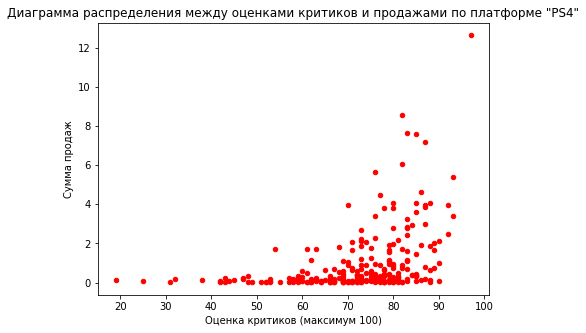

In [60]:
platform_ps4_critic.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5), color='red')
plt.title('Диаграмма распределения между оценками критиков и продажами по платформе "PS4"')
plt.xlabel('Оценка критиков (максимум 100)')
plt.ylabel('Сумма продаж')
plt.show()

In [61]:
print('Корреляция продаж и оценки критиков для платформы "PS4":', round(platform_ps4_critic['total_sales'].corr(platform_ps4_critic['critic_score']),3))

Корреляция продаж и оценки критиков для платформы "PS4": 0.407


In [62]:
# запишем в переменную информацию о платформе 'PS4' и оценкой пользователей
platform_ps4_user = actual_lifespan[(actual_lifespan['platform'] == 'PS4') & (actual_lifespan['user_score'] >= 0)]

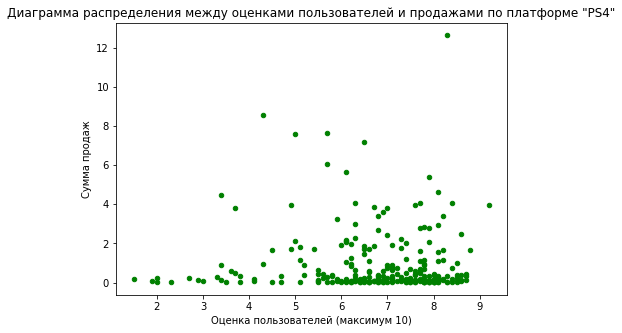

In [63]:
platform_ps4_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5), color='green')
plt.title('Диаграмма распределения между оценками пользователей и продажами по платформе "PS4"')
plt.xlabel('Оценка пользователей (максимум 10)')
plt.ylabel('Сумма продаж')
plt.show()

In [64]:
print('Корреляция продаж и оценки пользователей для платформы "PS4":', round(platform_ps4_user['total_sales'].corr(platform_ps4_user['critic_score']),3))

Корреляция продаж и оценки пользователей для платформы "PS4": 0.35


**Вывод о влиянии оценок критиков и пользователей на продажи на платформе 'PS4':** 

Прослеживается положительная свезь между оценкой критиков и проадажей копий игр на платформе 'PS4', по диаграмме рассеивания видно, что чем выше оценка критика, тем больше продаж было совершено *(Корреляция = 0,407)*.

Между оценками пользователей и суммой продаж прослеживается менее тесная связь *(Корреляция = 0,35)*. В целом можно сказать, что оценки пользователей имеют меньше влияния на продажи на платформе 'PS4'.

**Примечание:** Для сопоставления выводов, сделанных для платформы 'PS4', посмотрим, как оценки критиков и пользователей влияют на продажи на платформе XOne *(второй по прибыльности за последние 4 года, согласно этапу 3.3.)*.

In [65]:
# запишем в переменную информацию о платформе 'XOne' и оценкой критиков
platform_xone_critic = actual_lifespan[(actual_lifespan['platform'] == 'XOne') & (actual_lifespan['critic_score'] >= 0)]

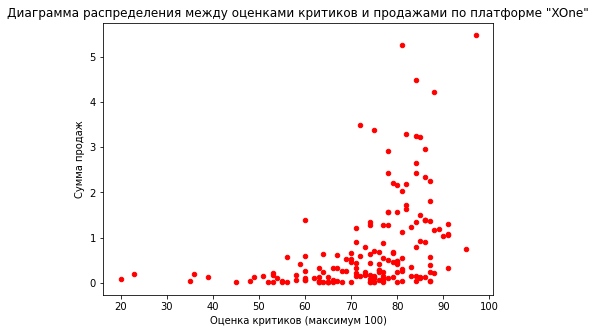

In [66]:
platform_xone_critic.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5), color='red')
plt.title('Диаграмма распределения между оценками критиков и продажами по платформе "XOne"')
plt.xlabel('Оценка критиков (максимум 100)')
plt.ylabel('Сумма продаж')
plt.show()

In [67]:
print('Корреляция продаж и оценки критиков для платформы "XOne":', round(platform_xone_critic['total_sales'].corr(platform_xone_critic['critic_score']),3))

Корреляция продаж и оценки критиков для платформы "XOne": 0.417


In [68]:
# запишем в переменную информацию о платформе 'XOne' и оценкой пользователей
platform_xone_user = actual_lifespan[(actual_lifespan['platform'] == 'XOne') & (actual_lifespan['user_score'] >= 0)]

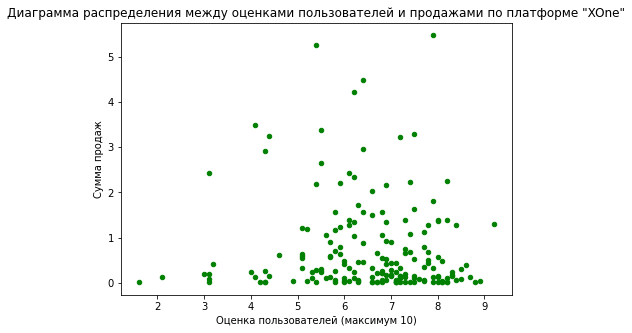

In [69]:
platform_xone_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5), color='green')
plt.title('Диаграмма распределения между оценками пользователей и продажами по платформе "XOne"')
plt.xlabel('Оценка пользователей (максимум 10)')
plt.ylabel('Сумма продаж')
plt.show()

In [70]:
print('Корреляция продаж и оценки пользователей для платформы "XOne":', round(platform_xone_user['total_sales'].corr(platform_xone_user['critic_score']),3))

Корреляция продаж и оценки пользователей для платформы "XOne": 0.334


**Вывод о влиянии оценок критиков и пользователей на продажи на платформе 'XOne':** 

Для платформы 'XOne' снова прослеживается положительная свезь между оценкой критиков и проадажей копий игр, по диаграмме рассеивания видно, что чем выше оценка критика, тем больше продаж было совершено *(Корреляция = 0,417)*.

Между оценками пользователей и суммой продаж прослеживается менее тесная связь *(Корреляция = 0,334)*. В целом можно сказать, что оценки пользователей на платформе 'XOne' также имеют меньше влияния на продажи.

**Примечание:** Для сопоставления выводов, сделанных для платформы 'PS4', посмотрим, как оценки критиков и пользователей влияют на продажи на платформе X360.

In [71]:
# запишем в переменную информацию о платформе 'X360' и оценкой критиков
platform_x360_critic = actual_lifespan[(actual_lifespan['platform'] == 'X360') & (actual_lifespan['critic_score'] >= 0)]

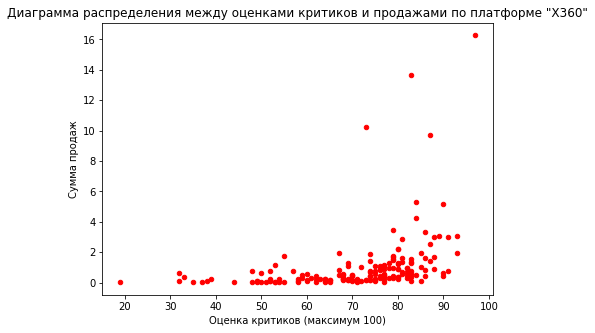

In [72]:
platform_x360_critic.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5), color='red')
plt.title('Диаграмма распределения между оценками критиков и продажами по платформе "X360"')
plt.xlabel('Оценка критиков (максимум 100)')
plt.ylabel('Сумма продаж')
plt.show()

In [73]:
print('Корреляция продаж и оценки критиков для платформы "X360":', round(platform_x360_critic['total_sales'].corr(platform_x360_critic['critic_score']),3))

Корреляция продаж и оценки критиков для платформы "X360": 0.361


In [74]:
# запишем в переменную информацию о платформе 'X360' и оценкой пользователей
platform_x360_user = actual_lifespan[(actual_lifespan['platform'] == 'X360') & (actual_lifespan['user_score'] >= 0)]

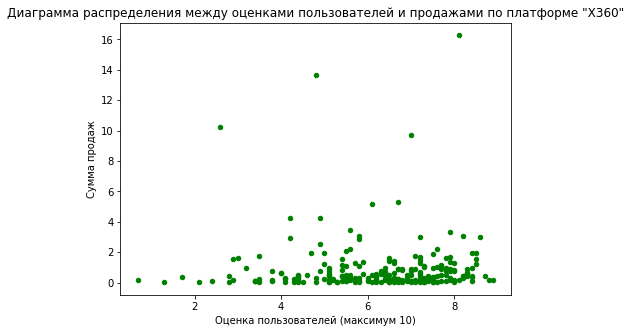

In [75]:
platform_x360_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5), color='green')
plt.title('Диаграмма распределения между оценками пользователей и продажами по платформе "X360"')
plt.xlabel('Оценка пользователей (максимум 10)')
plt.ylabel('Сумма продаж')
plt.show()

In [76]:
print('Корреляция продаж и оценки пользователей для платформы "X360":', round(platform_x360_user['total_sales'].corr(platform_x360_user['critic_score']),3))

Корреляция продаж и оценки пользователей для платформы "X360": 0.255


**Вывод о влиянии оценок критиков и пользователей на продажи на платформе 'X360':** 

Для платформы 'X360' снова прослеживается положительная (но слабая) связь между оценкой критиков и продажей копий игр, по диаграмме рассеивания видно, что чем выше оценка критика, тем больше продаж было совершено *(Корреляция = 0,361)*.

Между оценками пользователей и суммой продаж прослеживается менее тесная связь *(Корреляция = 0,225)*. В целом можно сказать, что оценки пользователей на платформе 'X360' также имеют меньше влияния на продажи.

**Примечание:** Для сопоставления выводов, сделанных для платформы 'PS4', посмотрим, как оценки критиков и пользователей влияют на продажи на платформе Wii.

In [77]:
# запишем в переменную информацию о платформе 'X360' и оценкой критиков
platform_wii_critic = actual_lifespan[(actual_lifespan['platform'] == 'Wii') & (actual_lifespan['critic_score'] >= 0)]

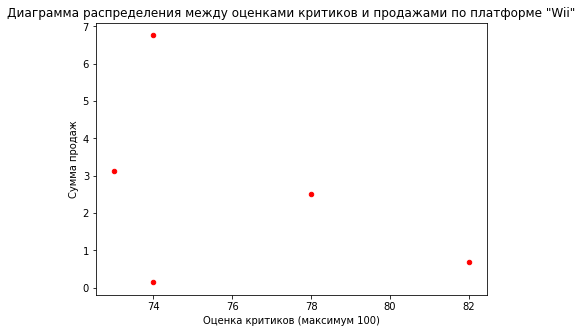

In [78]:
platform_wii_critic.plot(x='critic_score', y='total_sales', kind='scatter', figsize=(7, 5), color='red')
plt.title('Диаграмма распределения между оценками критиков и продажами по платформе "Wii"')
plt.xlabel('Оценка критиков (максимум 100)')
plt.ylabel('Сумма продаж')
plt.show()

In [79]:
print('Корреляция продаж и оценки критиков для платформы "Wii":', round(platform_wii_critic['total_sales'].corr(platform_wii_critic['critic_score']),3))

Корреляция продаж и оценки критиков для платформы "Wii": -0.424


In [80]:
# запишем в переменную информацию о платформе 'X360' и оценкой пользователей
platform_wii_user = actual_lifespan[(actual_lifespan['platform'] == 'Wii') & (actual_lifespan['user_score'] >= 0)]

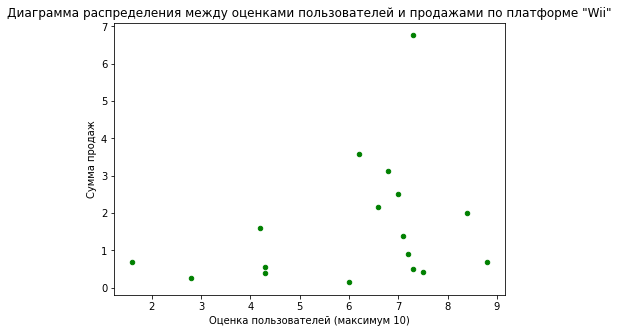

In [81]:
platform_wii_user.plot(x='user_score', y='total_sales', kind='scatter', figsize=(7, 5), color='green')
plt.title('Диаграмма распределения между оценками пользователей и продажами по платформе "Wii"')
plt.xlabel('Оценка пользователей (максимум 10)')
plt.ylabel('Сумма продаж')
plt.show()

In [82]:
print('Корреляция продаж и оценки пользователей для платформы "Wii":', round(platform_wii_user['total_sales'].corr(platform_wii_user['critic_score']),3))

Корреляция продаж и оценки пользователей для платформы "Wii": 0.385


**Вывод о влиянии оценок критиков и пользователей на продажи на платформе 'Wii':** 

Для платформы 'Wii' прослеживается отрицательная (относительно тесная) связь между оценкой критиков и продажей копий игр, было посчитано, что корреляция между оценкой критика и прожалей игры = -0,424.

Между оценками пользователей и суммой продаж прослеживается положительня, но менее тесная связь *(Корреляция = 0,385)*. В целом можно сказать, что оценки пользователей на платформе 'Wii' также имеют меньше влияния на продажи.

**Вывод по исследованию влияния отзывов пользователей и критиков на продажи внутри одной платформы:** 

В целом можно сказать, что присутствует общая тенденция о том, что от оценки критиков в большей степени зависит общая сумма продаж на платформе, по сравнению с оценкой пользователей *(как показали исследования корреляция между оценкой пользователей и продажами меньше, чем корреляция между оценкой критиков и продажами)*.

#### 3.6 Исследование на распределение игр по жанрам

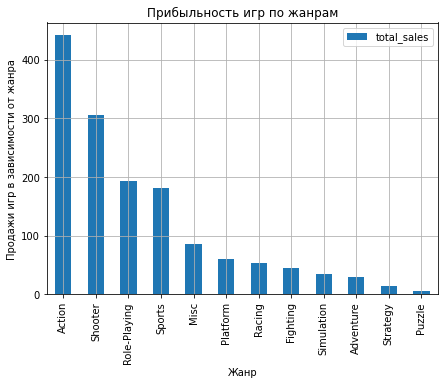

In [83]:
# сформируем сводную таблицу для построения графика распределения игр по жанрам и их прибыльности
(
    actual_lifespan.pivot_table(index='genre', values='total_sales', aggfunc='sum')
    .sort_values(by='total_sales', ascending=False)
    .plot(kind='bar', grid=True, figsize=(7, 5))
)
plt.title('Прибыльность игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Продажи игр в зависимости от жанра')
plt.show()

**Примечание:** По гистограмме видно, что наиболее прибыльными жанрами игр являются 'Action', 'Shooter', 'Role-playing' и 'Sports'.

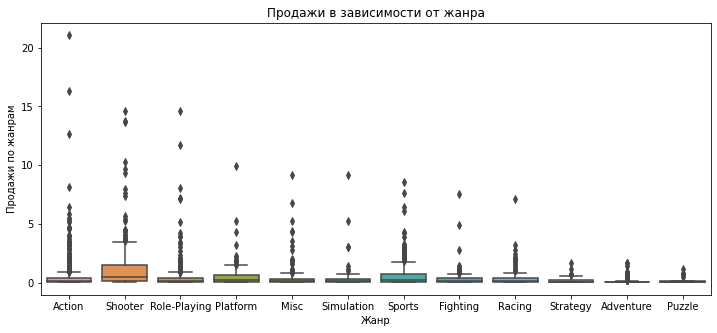

In [84]:
# построим диаграмму размаха для распределения игр по жанрам и их прибыльности
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=actual_lifespan, x='genre', y='total_sales')
plt.title('Продажи в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи по жанрам')
plt.show()

**Примечание:** Почти у всех платформ есть популярные жанры, которые продовались лучше всего. На диаграмме размаха они помечены выбросами. Чтобы посмотреть, какие жанры в среднем продовались лучше, необходимо обрезать наши выбивающиеся значения *(ограничим выборку 1,5 млн. игр, проданных с определенным жанром)*.

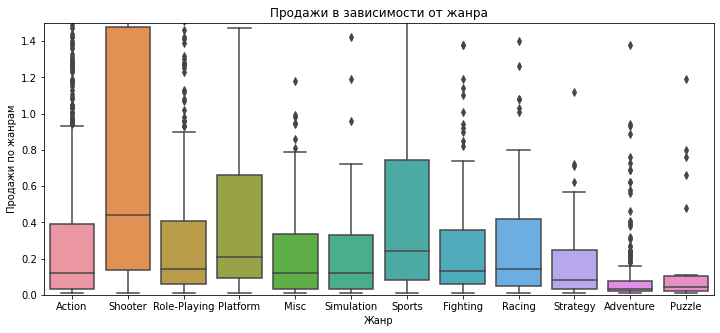

In [85]:
# построим диаграмму размаха для распределения игр по жанрам и их прибыльности
plt.figure(figsize=(12, 5))
ax = sns.boxplot(data=actual_lifespan, x='genre', y='total_sales')
ax.set(ylim=(0, 1.5)) # диапазон значений для оси Y будет органичена от 0 до 1.5 
plt.title('Продажи в зависимости от жанра')
plt.xlabel('Жанр')
plt.ylabel('Продажи по жанрам')
plt.show()

**Примечание:** По диаграмме размаха итоговые данные получились немного другие. Наиболее прибыльными жанрами стали: 'Shooter', 'Sports', как и по гистограмме, а также: 'Action' и 'Platform'. Стоит отметить, что жанр 'Action' занимает теперь не лидирующую позицию, лидером стал жанр 'Shooter'.

**Вывод по исследованию на распределение игр по жанрам:**

Можно сказать, что игры жанра 'Shooter' лидируют по продажам по сравнению с другими жанрами, скорее всего из-за каких-то очень популярных среди пользователей копий игр. Также игры жанра 'Shooter' обладают большим медианным значением прибыли.

#### 3.7 Обобщающий вывод этапа "Провести исследовательский анализ данных":
1. Для исследования не стоит использовать данные за все периоды, лучше брать игры, выпущенные за последние 5-10 лет. Это связано с тем, что со временем некоторые старые игры могут забываться, находится на стадии обновления, и поэтому не пользоваться высоким спросом. Проводить исследование лучше на актуальных данных.
2. Актуальный период для исследования и качественного построения прогноза на 2017 год - 4 года.
3. По графику видно, что в данном активном периоде жизни (2006-2016) потенциально прибыльными платформами будут являться PS4 и XOne.
4. Больше всего влияния на продажи оказывают оценки критиков.
5. Игры жанра 'Shooter' лидируют по продажам по сравнению с другими жанрами, скорее всего из-за каких-то очень популярных среди пользователей копий игр.

### 4 шаг. Составить портрет пользователя каждого региона

**Примечание:** На данном шаге проекта нам нужно будет отоброжать различные показатели в процентной составляющей (для этого лучше использовать круговые диаграммы) для трех регионов: Северная Америка, Европа, Япония.

In [86]:
# напишем универсальную функцию для построения круговых диаграмм
def graph_pie(data, title):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 6))
    fig.suptitle(title)
    ax1.pie(data['na_sales'], labels = data.index, autopct='%1.1f%%', normalize=True)
    ax1.set_title('Северная Америка')
    ax2.pie(data['eu_sales'], labels = data.index, autopct='%1.1f%%', normalize=True)
    ax2.set_title('Европа')
    ax3.pie(data['jp_sales'], labels = data.index, autopct='%1.1f%%', normalize=True)
    ax3.set_title('Япония')
    fig.tight_layout()

#### 4.1 Определим самые популярные платформы (топ-5) по регионам

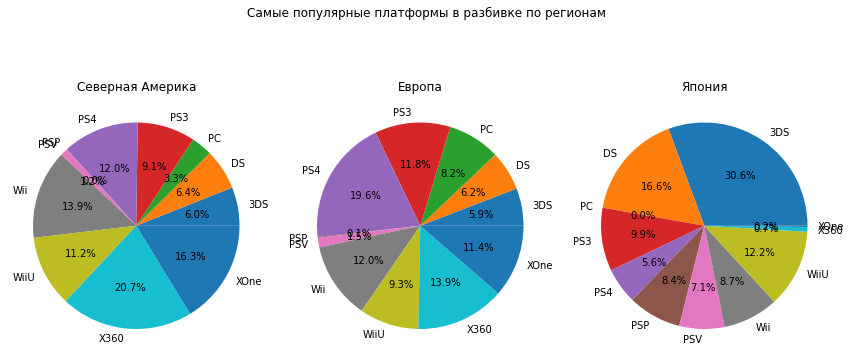

In [87]:
platform_regions = actual_lifespan.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'])
graph_pie(platform_regions, 'Самые популярные платформы в разбивке по регионам')

**Примечание:** По круговым диаграммам можно сказать следующее: в Северной Америке самой популярной платформой является 'X360', потом 'XOne', в Европе лидером стала 'PS4', затем 'X360', в целом можно сказать, что в Северной Америке и Европе разделения по полурности платформ в некоторых местах сходятся. В Японии самой популярной платформой является '3DS', это японская игровая приставка, выпущенная в 2011 году.

#### 4.2 Определим самые популярные жанры (топ-5) по регионам

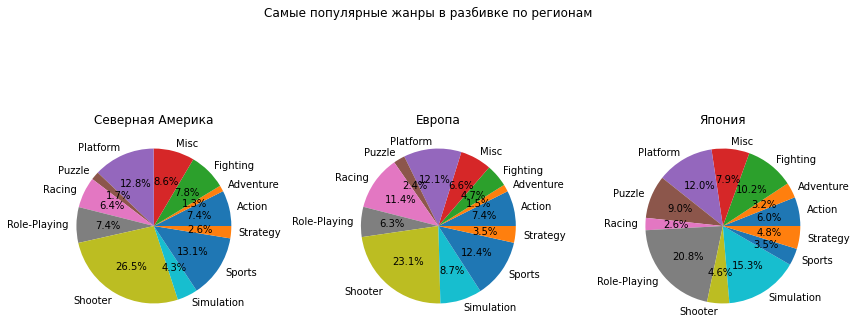

In [88]:
genre_regions = actual_lifespan.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'])
graph_pie(genre_regions, 'Самые популярные жанры в разбивке по регионам')

**Примечание:** В Северной Америка и Европе предпочитают жарны почти с одинаковым распределением, лидером является жанр 'Shooter'. Япония снова отличается по предпочтениям, популярными жанрами в этом регионе являются: 'Role-Playing' и 'Simulation'.

#### 4.3 Влияние ли рейтинга ESRB на продажи в регионах

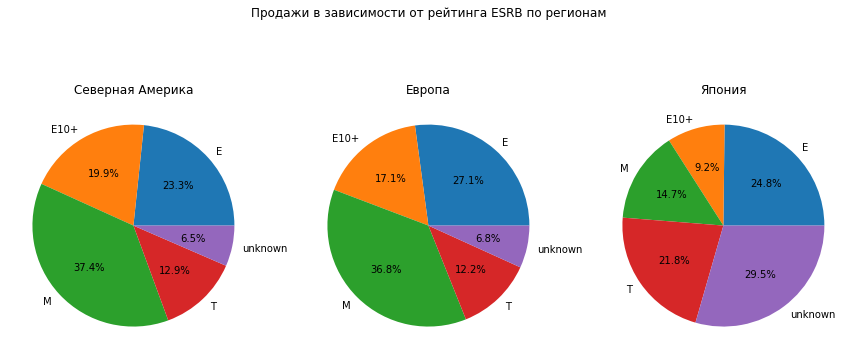

In [89]:
rating_regions = actual_lifespan.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'])
graph_pie(rating_regions, 'Продажи в зависимости от рейтинга ESRB по регионам')

**Примечание:** В Северной Америке и Европе можно сказать, что идентичное распределение продаваемых игр по рейтингу ESRB. Преобладают игры с рейтингом М *(пользователи, достигшие 17 лет и старше, при данном разбиение, скорее всего, это группа "взрослые")*, потом идет рейтинг Е *(игры, направленные на всех типов пользователей 'everyone')*. В Японии же все по другому. Первое место по продаваемости занимают игры без рейтинга ESRB *(значение типа 'unknown')*, потом тоже идут игры для всех, категории Е *(игры, направленные на всех типов пользователей 'everyone')*.

#### 4.5 Обобщающий вывод этапа "Составить портрет пользователя каждого региона":
1. Портреты пользователей из Северной Америки и Европы почти идентичны. Для них:
- Самыми популярными платформами являются: 'X360', 'XOne', 'PS4'.
- Самым популярным жанром является 'Shooter'.
- Чаще всего продыются игры с рейтингом ESRB: M (взрослые), потом E (для всех типов пользователей).
2. Портрет пользователей из Японии не похож на остальные регионы. Для него:
- Самой популярной платформой является '3DS'.
- Самыми популярными жанрами игр являяются: 'Role-Playing' и 'Simulation'.
- На первом месте стоят игры без указания рейтинга (значение типа 'unknown'), потом с рейтингом E (для всех типов пользователей).

### 5 шаг. Проверить гипотезы

#### 5.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

**Гипотезы для пункта 5.1:**

H0: Средние пользовательские рейтинги платформ XOne и PC равны.

H1: Средние пользовательские рейтинги платформ XOne и PC не равны.

In [90]:
# создадим выборку с данными о платформе 'XOne'
user_score_xone = actual_lifespan.query('platform == "XOne" and user_score > -1')

In [91]:
# посмотрим сводную статистику по столбцу 'user_score'
user_score_xone['user_score'].describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

**Примечание:** Количество значений выборки для платформы XOne = 182.

In [92]:
# создадим выборку с данными о платформе 'PC'
user_score_pc = actual_lifespan.query('platform == "PC" and user_score > -1')

In [93]:
# посмотрим сводную статистику по столбцу 'user_score'
user_score_pc['user_score'].describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

**Примечание:** Количество значений выборки для платформы PC = 206.

**Примечание по выборкам:** Предварительно можно сказать, что выборки не равны между собой *(они имеют разный размер)*, а также разное стандарное отклонение. Проверим это, проведя t-test "О равенстве средних двух генеральных совокупностей".

In [94]:
alpha = 0.05 # задаем уровень значимости

# проводим проверук гипотезы
result = st.ttest_ind(user_score_xone['user_score'] , user_score_pc['user_score'] , equal_var=False)

print('Значение p-value:', round(result.pvalue, 5))

if result.pvalue < alpha:
    print('Вывод: Отвергаем гипотезу H0.')
else:
    print('Вывод: Не можем отвергнуть гипотезу H0.')

Значение p-value: 0.54895
Вывод: Не можем отвергнуть гипотезу H0.


**Вывод для Проверки гипотез пункта 5.1:** По результатам проверки получилось, что мы "Не можем отвергнуть гипотезу Н0". Это значит, что при заданном уровне значимости с большей вероятностью средние пользовательские рейтинги платформ 'XOne' и 'PC' не имеют статистических отличий.

#### 5.2 Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

**Гипотезы для пункта 5.2:**

H0: Средние пользовательские рейтинги жанров Action и Sports равны.

H1: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [95]:
# создадим выборку с данными о жанре 'Action'
user_score_action = actual_lifespan.query('genre == "Action" and user_score > -1')

In [96]:
# посмотрим сводную статистику по столбцу 'user_score'
user_score_action['user_score'].describe()

count    523.000000
mean       6.825048
std        1.374440
min        1.600000
25%        6.250000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

**Примечание:** Количество значений выборки для жанра Action = 523.

In [97]:
# создадим выборку с данными о жанре 'Sports'
user_score_sports = actual_lifespan.query('genre == "Sports" and user_score > -1')

In [98]:
# посмотрим сводную статистику по столбцу 'user_score'
user_score_sports['user_score'].describe()

count    194.000000
mean       5.455670
std        1.743142
min        0.200000
25%        4.300000
50%        5.750000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

**Примечание:** Количество значений выборки для жанра Sports = 195.

**Примечание по выборкам:** Предварительно можно сказать, что выборки не равны между собой *(они имеют разный размер)*, а также разное стандарное отклонение. Проверим это, проведя t-test "О равенстве средних двух генеральных совокупностей".

In [99]:
alpha = 0.05 # задаем уровень значимости

# проводим проверук гипотезы
result = st.ttest_ind(user_score_action['user_score'] , user_score_sports['user_score'] , equal_var=False)

print('Значение p-value:', round(result.pvalue, 10))

if result.pvalue < alpha:
    print('Вывод: Отвергаем гипотезу H0.')
else:
    print('Вывод: Не можем отвергнуть гипотезу H0.')

Значение p-value: 0.0
Вывод: Отвергаем гипотезу H0.


**Вывод для Проверки гипотез пункта 5.2:** По результатам проверки получилось, что мы "Отвергаем гипотезу Н0". Это значит, что при заданном уровне значимости средние пользовательские рейтинги жанров 'Action' и 'Sports' не равны.

#### 5.3 Как были сформулированы нулевая и альтернативная гипотезы?

Было проведено два теста на проверку гипотез.

**1 тест:** Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Н0:** Вопрос полностью олицетворяет нулевую гипотезу, которая всегда чему-то равна: Средние пользовательские рейтинги платформ XOne и PC равны.

**Н1:** Альтернативная гипотеза обычно проверяет изменение в какую-либо сторону *(меньше или больше)* или же неравество, что и есть в нашем случае: Средние пользовательские рейтинги платформ XOne и PC не равны.

**2 тест:** Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Формулировка для второго теста звучит немного иначе, но также предполагает проверку на равество (неравество) двух выборок, поэтому нулевая и альтернативные гипотезы задаются аналогичным способом, как в первом тесте.

**Н0:** Средние пользовательские рейтинги жанров Action и Sports равны.

**Н1:** Средние пользовательские рейтинги жанров Action и Sports не равны.

#### 5.4 Какой критерий применялся для проверки гипотез? Почему?

Для проверки гипотез использовался **scipy.stats.ttest_ind** о равенстве средних двух генеральных совокупностей *(что полностью описывает поставленную в гипотезах задачу)*. Также был указан аргумент'equal_var=False' из-за предположения, что дисперсии генеральных совокупностей не равны. Также не был указан аргумент *(так как он принимается по умолчанию)* "alternative='two-sided'", он отвечает за проверку двусторонней гипотезы.

### 6. Общий вывод

В ходе работы были проанализированы данные интернет-магазина "Стримчик", который продает компьютерные игры по всему миру. Было реализовано 5 этапов работы.

**1 этап: Загрузить данные.** Во время проведения этого этапа было обнаружено:
1. Файл с данными состоит из 11 столбцов и 16715 строк, данных достаточно для проведения исследования.
2. В 6 колонках присутствуют пропущенные значения.
3. Названия столбцов имеют неприемлемый стиль.
4. В некоторых столбцах укаан некоректный тип данных.

**2 этап: Осуществить предобработку данных.** На этом этапе было сделано:
1. Заменены названия столбцов (приведены к нижнему регистру).
2. Выявлено, что в данных отсутствуют явные дубликаты.
3. Обработаны пропуски в столбцах 'name' и 'genre' *(имели общие пропуски)*.
4. Обработаны пропуски в столбце 'year_of_release' (они были удалены).
5. Обработаны проуски в столбцах 'user_score', 'critic_score', 'rating' (они были заменены значениями-маркерами (-1) и (unknown), соответственно).
6. Данные в столбцах 'year_of_release', 'user_score', 'critic_score' были приведены к нужному типу данных.
7. Был создан столбец 'total_sales' с общим количеством продаж во всех регионах.

**3 этап: Провести исследовательский анализ данных.** На этом этапе было выявлено, что:
1. Для исследования не стоит использовать данные за все периоды, лучше брать игры, выпущенные за последние 5-10 лет. Это связано с тем, что со временем некоторые старые игры могут забываться, находится на стадии обновления, и поэтому не пользоваться высоким спросом. Проводить исследование лучше на актуальных данных.
2. Актуальный период для исследования и качественного построения прогноза на 2017 год - 4 года.
3. По графику видно, что в данном активном периоде жизни (2006-2016) потенциально прибыльными платформами будут являться PS4 и XOne.
4. Больше всего влияния на продажи оказывают оценки критиков.
5. Игры жанра 'Shooter' лидируют по продажам по сравнению с другими жанрами, скорее всего из-за каких-то очень популярных среди пользователей копий игр.

**4 этап: Составить портрет пользователя каждого региона.** На нем были сделаны такие выводы для пользователей Северной Америки, Европы и Японии:
1. Портреты пользователей из Северной Америки и Европы почти идентичны. Для них:
- Самыми популярными платформами являются: 'X360', 'XOne', 'PS4'.
- Самым популярным жанром является 'Shooter'.
- Чаще всего продыются игры с рейтингом ESRB: M (взрослые), потом E (для всех типов пользователей).
2. Портрет пользователей из Японии не похож на остальные регионы. Для него:
- Самой популярной платформой является '3DS'.
- Самыми популярными жанрами игр являяются: 'Role-Playing' и 'Simulation'.
- На первом месте стоят игры без указания рейтинга (значение типа 'unknown'), потом с рейтингом E (для всех типов пользователей).

**5 этап: Проверить гипотезы.** После проведения тестов на проверку гипотез, результаты были таковы:
1. Вывод для Проверки гипотез пункта 5.1: По результатам проверки получилось, что мы "Не можем отвергнуть гипотезу Н0". Это значит, что при заданном уровне значимости средние пользовательские рейтинги платформ 'XOne' и 'PC' равны.
2. Вывод для Проверки гипотез пункта 5.2: По результатам проверки получилось, что мы "Отвергаем гипотезу Н0". Это значит, что при заданном уровне значимости средние пользовательские рейтинги жанров 'Action' и 'Sports' не равны.

Интернет-магазину "Стримчик" необходимо сделать ставку и спланировать рекламные кампании по продвижению потенциально прибыльных платформ, а именно PS4 и XOne, жанра типа 'Shooter', и быть нацелеными на возрастную категорию по рейтингу ESRB: 'E' *(для всех типов пользователей 'everyone')*.
